(-13.2, 13.2, -11.861943580461263, 15.338009938901383)

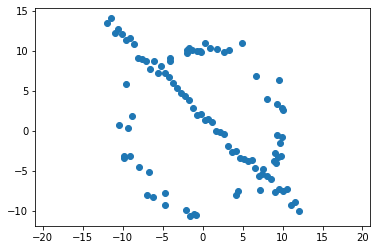

In [271]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
# np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x, y = (r + n)*np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))

plt.scatter(X[:,0], X[:,1])
plt.axis('equal')

-inf
1


/tmp/ipykernel_805/4048543437.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  N = np.log(1 - p) / (np.log(1 - e**n))


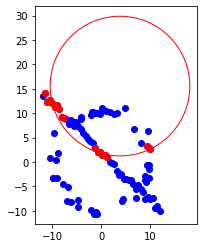

In [272]:
threshold = 1.96*s
n = X.shape[0]
N = np.inf
best_est = None
S_in = []
p = 0.9
i = 0
while N > i:
    random_index = np.random.randint(n, size=3)
    pt1, pt2, pt3 = X[random_index]

    A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
    B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])		
    inv_A = np.linalg.pinv(A)

    a, b = np.dot(inv_A, B) / 2
    a, b = a[0], b[0]
    r = np.sqrt((a - pt1[0])**2 + (b - pt1[1])**2)

    S_tst = []
    for x, y in X:
        dis = np.sqrt((x - a)**2 + (y - b)**2)
        if (np.abs(dis - r) < threshold):
            S_tst.append([x,y])
    
    if (len(S_tst) > len(S_in)):
        best_est = (a, b, r)
        S_in = S_tst
        e = len(S_in)/n
        N = np.log(1 - p) / (np.log(1 - e**n))
        print(N)
    i+=1

a, b, r = best_est[0], best_est[1], best_est[2]
S_in = np.array(S_in)
print(i)
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', label='data')
plt.scatter(S_in[:, 0], S_in[:, 1], c='red', marker='o', label='data')
circle = plt.Circle((a, b), radius=r, color='r', fc='y', fill=False)
plt.gca().add_patch(circle)

plt.axis('scaled')

plt.show()